# CLIMATE DATA CHALLENGE 2022

## Understanding Drivers of Uncerainty in Future Loss Projections

### Exposure scenario, sensitivity to:

- Popultation increases
- locality
- building type
- cost

In [ ]:
# Load libraries

In [1]:
import sys

import numpy as np

import pandas as pd

import ascend
from ascend import shape

import datetime

import iris

from matplotlib import pyplot as plt
import matplotlib.cm as cm

#import warnings
#warnings.filterwarnings('ignore')

In [2]:
# Define data filenames and paths

In [3]:
datadir = "/net/home/h04/jmendes/ClimateDataChallenge/Met-Office-Climate-Data-Challenge-May-2022/data"
fexposure = "UKMO_HACKATHON_EXPOSURE"
ssp_data = "/data/users/ldawkins/UKCR/DataForPaper/UKSSPs"
lst_countries = ["United Kingdom", "Italy"]

In [4]:
# Functions

In [5]:
def read_file(datadir, fname, country="all"):
    '''
    Read files from input directory.
    
    Args:
        datadir (str): Path to input data dir
        fname (str): Name of CSV file to load
        country (list (str)): Country names to be selected.
                              Default is to load all countries.
    
    Returns:
        Pandas dataframe of input data with 15-17 columns.
    '''

    # define filename
    file = f"{datadir}/{fname}.csv"

#    # define names of columns
#    columns = [
#        "LocationSID",
#        "LocationName",
#        "BuildingsReplacement",
#        "ContentsReplacement",
#        "BusinessInteruptionReplacement",
#        "CurrencyCode",
#        "Territory",
#        "CountryName",
#        "PostalCode",
#        "PostalName",
#        "Latitude",
#        "Longitude",
#        "Stories",
#        "Occupancy",
#        "Construction"
#    ]
    
    # read file as dataframe and return
#    return pd.read_csv(file, header = 1, names = columns)
    # Make a one column dataframe with each row being a line in the CSV file
    # original file is latin1 encoded
    df = pd.read_fwf(file, header=None, encoding='latin1')
    # split each row on commas and expand the dataframe
    dfmod = df[0].str.split(',', expand=True)
    if country == "all":
        return dfmod
    else:
        return dfmod.loc[dfmod.iloc[:,7].isin(country)]

#TODO: add multiple countries, isin?   


In [6]:
def convert_time(cube):
    '''
    Convert cube's time coordinate onto decade.
    
    Args:
        cube(iris cube): Input SSP cube.
                         time units are 'hours since 1970-01-01 00:00:00'
                         in Gregorian calendar.
    
    Returns:
        List of decades (datetime year format)
    '''


    decades = []
    for t in cube.coord("time"):
        decades.append(datetime.datetime.fromtimestamp(int(t.points)*3600).year)
    
    return decades

In [7]:
# Analyse exposure dataset

In [8]:
data = read_file(datadir, fexposure, country=lst_countries)

In [9]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1,258672,196534_Italy,5462623.123776,2731311.561888,2731311.561888,EUR,ITA,Italy,48015,Cervia,44.251431,12.314807,6,General commercial,Reinforced concrete MRF w/ URM,None,None,None
5,258684,308572_Italy,588517.858656,294258.929328,294258.929328,EUR,ITA,Italy,87036,Rende,39.347519,16.210797,1,General commercial,Reinforced concrete MRF w/ URM,None,None,None
11,258696,148321_Italy,58282.791839999998,29141.395919999999,29141.395919999999,EUR,ITA,Italy,36020,Albettone,45.437878,11.493785,2,General commercial,Reinforced concrete MRF w/ URM,None,None,None
14,75854,241986_Italy,945454.00219200004,472727.00109600002,472727.00109600002,EUR,ITA,Italy,03038,Roccasecca,41.535056,13.639658,6,General commercial,Reinforced concrete MRF w/ URM,None,None,None
16,75857,218840_Italy,8246242.4254559996,4123121.2127279998,4123121.2127279998,EUR,ITA,Italy,61029,Urbino,43.739633,12.623735,4,General commercial,Reinforced concrete MRF w/ URM,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462597,258634,222046_Italy,533657.45160000003,266828.72580000001,266828.72580000001,EUR,ITA,Italy,62024,Matelica,43.271749,13.024363,1,General commercial,Reinforced concrete MRF w/ URM,None,None,None
2462599,258637,186817_Italy,77168.189692,38584.094846,38584.094846,EUR,ITA,Italy,43053,Compiano,44.532012,9.677676,4,General commercial,Reinforced concrete MRF w/ URM,None,None,None
2462604,258660,13820_Italy,218978.73230599999,109489.366153,109489.366153,EUR,ITA,Italy,10040,Caprie,44.959629,7.508990,2,General commercial,Reinforced concrete MRF w/ URM,None,None,None
2462605,258662,305877_Italy,17585.555622,8792.7778109999999,8792.7778109999999,EUR,ITA,Italy,87010,Cervicati,39.849152,16.310367,1,General commercial,Reinforced concrete MRF w/ URM,None,None,None


In [10]:
# Assign column names
cols_dict = {
    list(data)[0]: "LocationSID",
    list(data)[1]: "LocationName",
    list(data)[2]: "BuildingsReplacement",
    list(data)[3]: "ContentsReplacement",
    list(data)[4]: "BusinessInteruptionReplacement",
    list(data)[5]: "CurrencyCode",
    list(data)[6]: "Territory",
    list(data)[7]: "CountryName",
    list(data)[8]: "PostalCode",
    list(data)[9]: "PostalName",
    list(data)[10]: "Latitude",
    list(data)[11]: "Longitude",
    list(data)[12]: "Stories",
    list(data)[13]: "Occupancy",
    list(data)[14]: "Construction"
}

data.rename(columns=cols_dict, inplace=True)

In [11]:
# Save country data with assign column names
data.iloc[:,:15].to_csv(f"{datadir}/{fexposure}_UK.csv", header=True, index=False)

In [16]:
# Get list of fields:
print("Stories: ", data["Stories"].unique())
print("Occupancy: ", data["Occupancy"].unique())
print("Construction: ", data["Construction"].unique())

Stories:  ['6' '1' '2' '4' '3' '7']
Occupancy:  ['General commercial' 'General residential' 'General industrial']
Construction:  ['Reinforced concrete MRF w/ URM' 'Reinforced concrete MRF w/ UR'
 'Reinforced con' 'Reinforced concrete' 'Reinforced concrete MRF'
 'Reinforced conc' 'Reinforced concrete MRF w/' 'Reinforced concrete MR'
 'Reinforced concret' 'Reinforced concrete MRF w/ U' 'Confined Masonry'
 'Confined Mason' 'Confined Masonr' 'Unreinforced masonry bearing frame'
 'Unreinforced m' 'Unreinforced masonry be'
 'Unreinforced masonry bearing fr' 'Unreinforced ma'
 'Unreinforced masonry bearing f' 'Unreinforced masonry bearing'
 'Unreinforced masonry bearing fra' 'Reinforced concrete MRF w'
 'Unreinforced masonry bearin' 'Unreinforced mason'
 'Unreinforced masonry b' 'Unreinforced masonry bea'
 'Unreinforced masonry bearing fram' 'Unreinforced' 'Unreinforced masonry'
 'Unreinforced masonry beari' 'Unreinforced mas' 'Unreinforced maso'
 'Wood frame' 'Braced steel frame' 'Pre-cast c

In [ ]:
# Analyse shapefile

In [ ]:
shp = shape.load_shp(f"{ssp_data}/Control_scenario_UK.shp")

In [ ]:
shp

In [ ]:
shape.show(shp, bounds=[-20, 40, 35, 72], scale="50m")

In [17]:
ne_dir = "/project/cst/ascend/natural_earth/50m_physical"
river_shapefile = f"{ne_dir}/ne_50m_rivers_lake_centerlines.shp"


In [20]:
#rivers = shape.load_shp(river_shapefile)
#rivers.show(bounds=[-4., 3., 50., 55.], scale='10m')

#rivers_select = [
#    "Ness",
#    "Oich",
#    "Trent",
#    "Severn",
#    "Caledonian Canal",
#    "Thames",
#    "Annalee",
#    "Great Ouse",
#    "Tweed",
#    "Wye",
#    "Swale",
#    "Bann",
#    "Tay",
#    "Blackwater"
#]
#
#for river in rivers_select:
#    river_shape = shape.load_shp(river_shapefile, name=river)[0]
#    river_shape.show(bounds=[-4., 3., 50., 55.], scale='50m')

[ascend.Shape object
data: <class 'shapely.geometry.linestring.LineString'>
attributes: featurecla: River
attributes: name: Thames
attributes: note: None
...
is_valid: True
coord_system: GeogCS(6371229.0)]


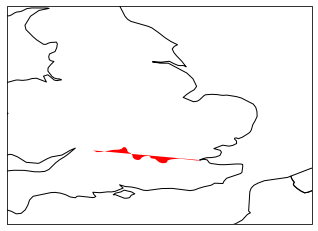

In [27]:
thames_shape = shape.load_shp(river_shapefile, name='Thames')[0] #select first shape from the list
thames_shape.show(bounds=[-4., 3., 50., 55.], scale='50m')

In [ ]:
# Analyse SSPs

In [ ]:
pop1 = iris.load_cube(f"{ssp_data}/population_SSP1_12km.nc")

In [ ]:
pop1_decades = convert_time(pop1)

In [ ]:
pop1_decades

In [ ]:

# average annual loss by region (what loss is going to be in each year)
# or in EP basis - CAP? model: exposure component - take climate data; 

# number of storeys, construction ...
#we're only going to modify cost fields for the UK
# average annual loss across UK, change in EP curve

In [ ]:
# MAIN
def main():
    '''
    Loop through changes.
    Plot.
    '''


In [ ]:
if __name__ == '__main__':
    main()